In [4]:
import pandas as pd 
import numpy as np 

data = pd.read_csv('transaction_data.csv')


In [5]:
#colums
data.columns.tolist()
data.head()


,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [6]:
#shape
print(data.shape)

(1083818, 8)


In [7]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
UserId                    1083818 non-null int64
TransactionId             1083818 non-null int64
TransactionTime           1083818 non-null object
ItemCode                  1083818 non-null int64
ItemDescription           1080910 non-null object
NumberOfItemsPurchased    1083818 non-null int64
CostPerItem               1083818 non-null float64
Country                   1083818 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 53.7+ MB


In [8]:
#there are integers, null values, object, float in data
#count of nullvalues
data.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [9]:
#lets try to group the customers based on country
#count of customers in each country
user_country = data[['Country','UserId']].drop_duplicates()
print(user_country.groupby(['Country'])['UserId'].aggregate('count').sort_values(ascending=False))

Country
United Kingdom          3951
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     5
Greece                     4
USA                        4
EIRE                       4
Canada                     4
Bahrain                    3
United Arab Emirates       2
Malta                      2
Singapore                  1
Brazil                     1
Iceland                    1
Saudi Arabia               1
Hong Kong                  1
RSA                        1
Europe

In [10]:
#majority of customers are from UK

#lets consider UK data
data = data[data['Country'] == 'United Kingdom']
#lets drop description column
data.drop(['ItemDescription'], axis=1, inplace = True)

In [11]:
data.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,990956.000000,9.909560e+05,9.909560e+05,990956.000000,9.909560e+05
mean,238466.593663,6.159170e+06,6.660664e+05,25.816458,9.683529e+00
std,147692.882732,1.485068e+05,4.582890e+05,682.765924,2.413716e+03
min,-1.000000,5.900015e+06,-1.000000e+00,-242985.000000,-1.526564e+04
25%,-1.000000,6.026350e+06,4.613070e+05,3.000000,1.730000e+00
50%,305172.000000,6.165544e+06,4.755240e+05,9.000000,2.900000e+00
75%,345345.000000,6.291615e+06,4.891950e+05,30.000000,5.700000e+00
max,384027.000000,6.397446e+06,1.894494e+06,242985.000000,1.696285e+06


In [12]:
#we can see there are negative values in UserID, Itemcode, items purchased and cost which is not realistic 
#so lets get the values that are greater than  0

data = data[data['UserId']>0]
data = data[data['ItemCode']>0]
data = data[data['NumberOfItemsPurchased']>0]
data = data[data['CostPerItem']>0]
data.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,708030.000000,7.080300e+05,7.080300e+05,708030.00000,7.080300e+05
mean,326600.987026,6.167401e+06,6.527809e+05,36.01150,8.745864e+00
std,33484.046632,1.448567e+05,4.396272e+05,567.92372,2.850938e+03
min,259266.000000,5.900015e+06,4.200000e+01,3.00000,6.000000e-02
25%,298074.000000,6.041651e+06,4.626090e+05,6.00000,1.730000e+00
50%,325962.000000,6.180900e+06,4.760700e+05,12.00000,2.700000e+00
75%,355551.000000,6.295245e+06,4.891110e+05,36.00000,5.180000e+00
max,384027.000000,6.397446e+06,1.894494e+06,242985.00000,1.696285e+06


In [ ]:
#lets convert the string Transaction date
data['TransactionTime'] = pd.to_datetime(data['TransactionTime'])

In [14]:
#Now lets calculate total amount and make it into a new column
data['TotalAmount'] = data['NumberOfItemsPurchased']*data['CostPerItem']
data.shape

(708030, 8)

In [15]:
data.head()

,UserId,TransactionId,TransactionTime,ItemCode,NumberOfItemsPurchased,CostPerItem,Country,TotalAmount
0,278166,6355745,2019-02-02 12:50:00,465549,6,11.73,United Kingdom,70.38
1,337701,6283376,2018-12-26 09:06:00,482370,3,3.52,United Kingdom,10.56
3,380478,6044973,2018-06-22 07:14:00,459186,3,1.73,United Kingdom,5.19
5,285957,6307136,2019-01-11 09:50:00,1787247,12,3.52,United Kingdom,42.24
6,345954,6162981,2018-09-28 10:51:00,471576,9,6.84,United Kingdom,61.56


In [16]:
#Now we are going find RFM rate for the users
import datetime as dt
#To calculate the number of days from the recent purchase last date is 2-2-2019
Last_date = dt.datetime(2019,2,20)

In [17]:
#RFM rate for each customer
RFM_rate = data.groupby('UserId').agg({'TransactionTime':lambda x:(Last_date-x.max()).days,'TransactionId' : lambda x: len(x), 'TotalAmount': lambda x:x.sum()})

In [18]:
#converting Transaction time into int
RFM_rate['TransactionTime'] = RFM_rate['TransactionTime'].astype(int)

In [19]:
#lets name the columns as Recency, frequency, monetary
RFM_rate.rename(columns={'TransactionTime':'Recency', 'TransactionId':'Frequency', 'TotalAmount':'Monetary'}, inplace=True)


In [20]:
RFM_rate.reset_index().head()

,UserId,Recency,Frequency,Monetary
0,259266,324,2,641217.60
1,267687,1,206,34785.78
2,267708,-3286,9160,268210.08
3,267729,2,398,33914.88
4,269220,2,118,7821.24


In [21]:
RFM_rate = RFM_rate[RFM_rate['Recency']>0]

In [22]:
RFM_rate.describe()

,Recency,Frequency,Monetary
count,3735.000000,3735.000000,3.735000e+03
mean,94.099866,160.620080,3.409072e+04
std,99.569571,295.094874,1.332467e+06
min,1.000000,2.000000,3.114000e+01
25%,18.000000,32.000000,2.409690e+03
50%,52.000000,78.000000,5.160840e+03
75%,150.000000,186.000000,1.222950e+04
max,372.000000,10190.000000,8.142170e+07


In [23]:
#visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.distplot(RFM_rate.Recency)

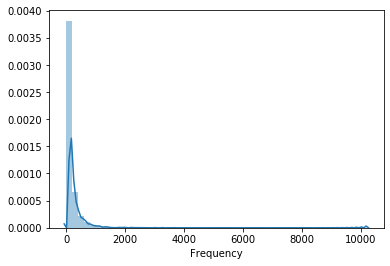

In [24]:
ax = sns.distplot(RFM_rate.Frequency)

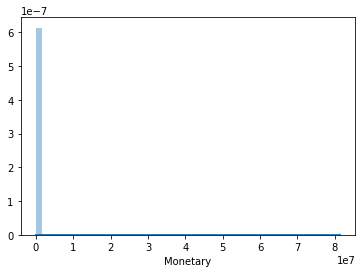

In [25]:
ax = sns.distplot(RFM_rate.Monetary)

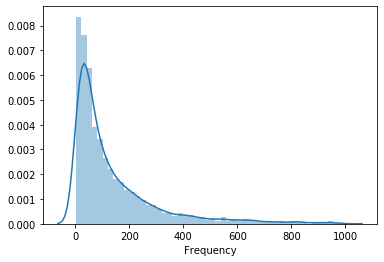

In [26]:
x = RFM_rate[RFM_rate.Frequency < 1000]
ax = sns.distplot(x.Frequency)

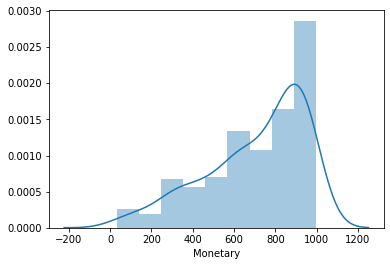

In [27]:
x = RFM_rate[RFM_rate.Monetary < 1000]
ax = sns.distplot(x.Monetary)

In [28]:
#now lets split the data into four segments
data_quantiles = RFM_rate.quantile([0.25,0.5,0.75])
data_quantiles.to_dict()

{'Recency': {0.25: 18.0, 0.5: 52.0, 0.75: 150.0},
 'Frequency': {0.25: 32.0, 0.5: 78.0, 0.75: 186.0},
 'Monetary': {0.25: 2409.6899999999996, 0.5: 5160.839999999999, 0.75: 12229.5}}

In [29]:
#to create segments of Receny and frequency

def Recency_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def Frequency_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

    

In [30]:
#lets calculate R, F, M values for the data and make them into a new columns
RFM_rate['R'] = RFM_rate['Recency'].apply(Recency_score, args =('Recency',data_quantiles,))
RFM_rate['F'] = RFM_rate['Frequency'].apply(Frequency_score, args =('Frequency',data_quantiles,))
RFM_rate['M'] = RFM_rate['Monetary'].apply(Frequency_score, args =('Monetary',data_quantiles,))

In [31]:
RFM_rate.head()

,Recency,Frequency,Monetary,R,F,M
UserId,,,,,,
259266,324,2,641217.60,4,4,1
267687,1,206,34785.78,1,1,1
267729,2,398,33914.88,1,1,1
269220,2,118,7821.24,1,2,2
269241,213,12,769.56,4,4,4


In [32]:
#Now lets get RFM value and make a new coloumn for it
RFM_rate['RFMvalue'] = RFM_rate[['R','F','M']].sum(axis = 1)

In [33]:
RFM_rate.head()

,Recency,Frequency,Monetary,R,F,M,RFMvalue
UserId,,,,,,,
259266,324,2,641217.60,4,4,1,9
267687,1,206,34785.78,1,1,1,3
267729,2,398,33914.88,1,1,1,3
269220,2,118,7821.24,1,2,2,5
269241,213,12,769.56,4,4,4,12


In [34]:
#Now we are going to use K-mean clustering alogarithm for clustering
#using logarithmic function for normalizing the data
#firstly lets remove zero values from data
def removeZero(val):
    if val <= 0:
        return 1
    else:
        return val
RFM_rate['Recency'] = [removeZero(i) for i in RFM_rate['Recency']]
RFM_rate['Frequency'] = [removeZero(i) for i in RFM_rate['Frequency']]
RFM_rate['Monetary'] = [removeZero(i) for i in RFM_rate['Monetary']]

In [35]:
log_data = RFM_rate[['Recency','Frequency','Monetary']].apply(np.log, axis=1).round(1)

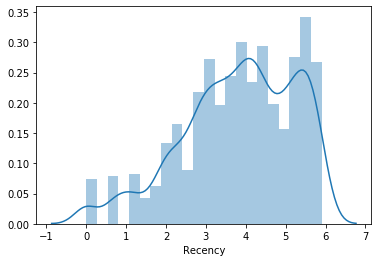

In [36]:
sns.distplot(log_data.Recency)

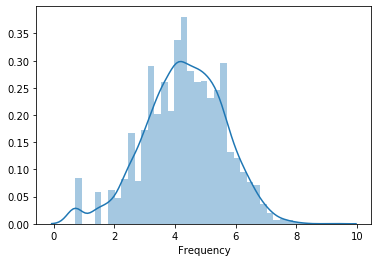

In [37]:
x = log_data[log_data.Frequency < 1000]
ax = sns.distplot(x.Frequency)

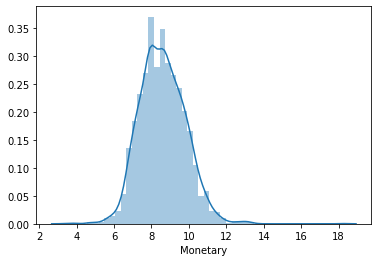

In [38]:
x = log_data[log_data.Monetary < 1000]
ax = sns.distplot(x.Monetary)

In [39]:
#the ranges of data of recency , frequency, monetary are different lets make them for the same scale
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(log_data)

In [40]:
scaled_data = pd.DataFrame(scaled_data, index = RFM_rate.index , columns = log_data.columns)

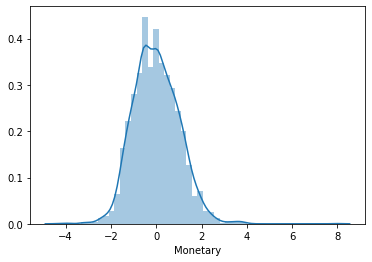

In [41]:
x = scaled_data[scaled_data.Monetary < 1000]
ax = sns.distplot(x.Monetary)

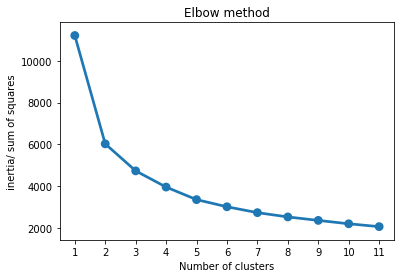

In [42]:
#now we can impliment KMEANS algorithm
#we use elbow method to choose the optimal number of clusters
from sklearn.cluster import KMeans

inertia_val = {}
for i in range(1,12):
    km = KMeans(n_clusters = i,init='k-means++', max_iter=1000)
    km = km.fit(scaled_data)
    inertia_val[i] = km.inertia_

sns.pointplot(x = list(inertia_val.keys()), y =list(inertia_val.values()) )
plt.xlabel('Number of clusters')
plt.ylabel('inertia/ sum of squares')
plt.title('Elbow method')
plt.show()
    


In [43]:
kmean = KMeans(n_clusters = 3,init='k-means++', max_iter=1000)
kmean.fit(scaled_data)

#lets get the labels into a new column
scaled_data['Cluster'] = kmean.labels_
scaled_data.reset_index().head()

,UserId,Recency,Frequency,Monetary,Cluster
0,259266,1.411726,-2.757000,3.971392,0
1,267687,-2.702216,0.763529,1.573039,1
2,267729,-2.205706,1.299262,1.490338,1
3,269220,-2.205706,0.380863,0.332512,1
4,269241,1.128006,-1.379401,-1.652331,2


In [44]:
segmentation = pd.DataFrame(scaled_data['Cluster'], index=scaled_data.index)

In [45]:
segmentation.head()

,Cluster
UserId,
259266,0
267687,1
267729,1
269220,1
269241,2


In [46]:
segmentation.to_csv('USER_SEGMENTATION.csv', index=True)

In [48]:
RFM_rate['Cluster'] = scaled_data['Cluster']
RFM_rate.head()

,Recency,Frequency,Monetary,R,F,M,RFMvalue,Cluster
UserId,,,,,,,,
259266,324,2,641217.60,4,4,1,9,0
267687,1,206,34785.78,1,1,1,3,1
267729,2,398,33914.88,1,1,1,3,1
269220,2,118,7821.24,1,2,2,5,1
269241,213,12,769.56,4,4,4,12,2
